## Imports

In [2]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [53]:
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
DATASET_FILEPATH = "../Data Preprocessed/BERT_full2.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
# DATASET_FILEPATH = "../Data Preprocessed/Dataset_sentiment_100K_91_glove_filtered_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [54]:
DATASET_FILEPATHS = ["../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"../Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"../Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

### Comparing sentiment scores of differnet methods

<ipython-input-55-1d331504cb68>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


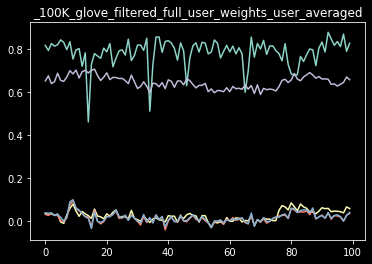

In [55]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
plt.show()

### Linear Regression of different sentiment analyis methods and next day Open price

In [56]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

_100K_glove_filtered_2g
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.716
Date:                Thu, 15 Jul 2021   Prob (F-statistic):              0.190
Time:                        01:30:15   Log-Likelihood:                -13248.
No. Observations:                1428   AIC:                         2.650e+04
Df Residuals:                    1426   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5495

## Import Sentiment values

In [59]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format_ = "%Y-%m-%d %H:%M:%S"
df.index = [datetime.strptime(i, format_) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open,date,place,datetime,time
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13,0,2017-09-13 01:00:00,01:00:00
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13,1,2017-09-13 02:00:00,02:00:00
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13,2,2017-09-13 03:00:00,03:00:00
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13,3,2017-09-13 04:00:00,04:00:00
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13,4,2017-09-13 05:00:00,05:00:00
...,...,...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22,1408,2019-01-22 18:00:00,18:00:00
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22,1409,2019-01-22 19:00:00,19:00:00
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22,1410,2019-01-22 20:00:00,20:00:00
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22,1411,2019-01-22 21:00:00,21:00:00


## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [60]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
sys.path.append('../Data Preprocessed')
from custom_trading_engine import customNLP
from signals import *
from strategies import *
from data_import import BTC_total

### Final Dataset creation

In [ ]:
# take btc prices
btc = pd.read_csv('../BTC_full2_1.csv', index_col = 0)
format = "%Y-%m-%d %H"
btc.index = [datetime.strptime(i, format) for i in btc.index]

In [61]:
#add date columsn to the btc price and sentiment datasets
btc['date'] = btc.index
df['date'] = df.index

# take the intersection of the two datasets to find the final dataset
df_final = pd.merge(df, btc, how = 'inner', on = ['date'])
df_final.index = df_final['date']
df_final.to_csv('./final_dataset.csv')
df_final

,Bitcoin,Bitcoin_median,Open,date,place,datetime,time,open,close,volume
date,,,,,,,,,,
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13 01:00:00,0,2017-09-13 01:00:00,01:00:00,4135.00,4110.97,1.210418e+06
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13 02:00:00,1,2017-09-13 02:00:00,02:00:00,4101.49,4034.86,4.198789e+06
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13 03:00:00,2,2017-09-13 03:00:00,03:00:00,4026.00,3945.01,7.790633e+06
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13 04:00:00,3,2017-09-13 04:00:00,04:00:00,3945.01,4004.40,4.982865e+06
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13 05:00:00,4,2017-09-13 05:00:00,05:00:00,4009.99,3984.97,3.957893e+06
...,...,...,...,...,...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22 18:00:00,1408,2019-01-22 18:00:00,18:00:00,3591.44,3586.57,8.050906e+05
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22 19:00:00,1409,2019-01-22 19:00:00,19:00:00,3586.74,3579.28,2.155876e+06
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22 20:00:00,1410,2019-01-22 20:00:00,20:00:00,3581.87,3587.78,4.808546e+05


### Final Dataset import

In [64]:
df_final = pd.read_csv('../final_dataset.csv', index_col = 0)
format = "%Y-%m-%d %H:%M:%S"
df_final.index = [datetime.strptime(i, format) for i in df_final.index]
df_final

,Bitcoin,Bitcoin_median,Open,date.1,place,datetime,time,open,close,volume
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13 01:00:00,0,2017-09-13 01:00:00,01:00:00,4135.00,4110.97,1.210418e+06
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13 02:00:00,1,2017-09-13 02:00:00,02:00:00,4101.49,4034.86,4.198789e+06
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13 03:00:00,2,2017-09-13 03:00:00,03:00:00,4026.00,3945.01,7.790633e+06
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13 04:00:00,3,2017-09-13 04:00:00,04:00:00,3945.01,4004.40,4.982865e+06
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13 05:00:00,4,2017-09-13 05:00:00,05:00:00,4009.99,3984.97,3.957893e+06
...,...,...,...,...,...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22 18:00:00,1408,2019-01-22 18:00:00,18:00:00,3591.44,3586.57,8.050906e+05
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22 19:00:00,1409,2019-01-22 19:00:00,19:00:00,3586.74,3579.28,2.155876e+06
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22 20:00:00,1410,2019-01-22 20:00:00,20:00:00,3581.87,3587.78,4.808546e+05
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22 21:00:00,1411,2019-01-22 21:00:00,21:00:00,3587.78,3573.59,3.907966e+05


### Spreads Import

In [32]:
# import the spreads from Kraken historical data
df1 = pd.read_csv('../Data/bitcoinity_data.csv', index_col = False)
format2 = "%Y-%m-%d %H:%M:%S"
df1.index = df1['Time'].apply(lambda x: str(x)[:-4])
df1.index = [datetime.strptime(i, format2) for i in df1.index]
df1.columns = ['date','spreads']
# spreads are in % values
df1['spreads'] = df1['spreads']/100
df1

#algo.add_spreads(df1['spreads'])

,date,spreads
2014-02-15,2014-02-15 00:00:00 UTC,0.013573
2014-02-16,2014-02-16 00:00:00 UTC,0.011486
2014-02-17,2014-02-17 00:00:00 UTC,0.012024
2014-02-18,2014-02-18 00:00:00 UTC,0.009083
2014-02-19,2014-02-19 00:00:00 UTC,0.008272
...,...,...
2021-06-19,2021-06-19 00:00:00 UTC,0.000045
2021-06-20,2021-06-20 00:00:00 UTC,0.000046
2021-06-21,2021-06-21 00:00:00 UTC,0.000090
2021-06-22,2021-06-22 00:00:00 UTC,0.000113


### Running Backtesting

In [98]:
# SIGNALS
signal = Signal_mean_window(df_final['Bitcoin'], pos = -0.1, window_size = 15)
# signal = Signal_mean(df_final['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = 1)

# STRATEGIES
strategy = BitcoinNLPStrategy(repos = 1.5)
strategy.add_signal(signal)

# BACKTESTER
algo = customNLP(1, df_final[['open','close']], strategy, leverage = True)

# SPREADS
algo.add_spreads(df1['spreads'])

# RUN
algo.run(split = True)

Opening LONG position of  1.3112913016171435  USD at  4027.8696671292864  $
Opening SHORT position of  1.274136697969602  USD at  3943.1779444804506  $
Opening SHORT position of  0.2008684347902107  USD at  3934.0321937239264  $
Opening LONG position of  0.209387857939778  USD at  3931.22480626374  $
Opening SHORT position of  0.2130490173664363  USD at  3853.1297821137537  $
Opening LONG position of  0.1677195353557951  USD at  3946.3318186764704  $
Opening SHORT position of  0.03352493869630631  USD at  3904.905726287301  $
Closing SHORT position of  -0.033180393909838804  USD at  3843.34  $
Opening LONG position of  0.059923292066409645  USD at  3861.1636857890458  $
Opening SHORT position of  0.09977290056226143  USD at  3692.288127421162  $
Opening LONG position of  0.14263993865302327  USD at  3645.050007711334  $
Closing LONG position of  0.10279033015717148  USD at  3616.77  $
Opening LONG position of  0.21465930416031923  USD at  3936.0442108569305  $
Opening SHORT position of

Opening SHORT position of  0.4450569502908438  USD at  11213.605351648985  $
Opening LONG position of  0.06242166801336184  USD at  11769.70412197442  $
Opening SHORT position of  0.10087507379469088  USD at  12010.570875669657  $
Closing SHORT position of  -0.0476675425717059  USD at  11255.08  $
Opening LONG position of  0.008570433864056808  USD at  11975.263200558235  $
Opening SHORT position of  0.056765298425963645  USD at  11963.696429898777  $
Opening LONG position of  0.056350141396290285  USD at  12102.198317112736  $
Opening SHORT position of  0.1632874966258681  USD at  11279.207926873516  $
Opening LONG position of  0.18922936805403404  USD at  11507.143059204718  $
Opening SHORT position of  0.056473945035579856  USD at  11396.357768354139  $
Opening LONG position of  0.22746571862369186  USD at  11249.981137489547  $
Closing LONG position of  0.20508892185066135  USD at  11550.01  $
Opening LONG position of  0.1905694425668454  USD at  10433.591284655366  $
Opening SHORT

Opening SHORT position of  0.08395509165062259  USD at  7636.1827895203  $
Closing SHORT position of  -0.01288771308527191  USD at  7618.45  $
Opening LONG position of  0.5436460221533548  USD at  6589.867387018853  $
Opening SHORT position of  0.5676884677878832  USD at  6604.80952150235  $
Opening LONG position of  0.10064572565837207  USD at  6569.753793398126  $
Opening SHORT position of  0.14986256673537984  USD at  6574.544930696752  $
Opening LONG position of  0.10595010430841162  USD at  6593.488033906325  $
Opening SHORT position of  0.06404875928466938  USD at  6593.471547939896  $
Opening LONG position of  0.05806529669908507  USD at  6501.431586524339  $
Opening SHORT position of  0.0431690911258837  USD at  6548.009673346881  $
Closing SHORT position of  -0.016461736114592562  USD at  6389.23  $
Opening LONG position of  0.04511726243441816  USD at  6488.7524658706225  $
Closing LONG position of  0.04511726243441816  USD at  6451.16  $
Opening LONG position of  0.027738979

Opening LONG position of  0.20794536631154847  USD at  6422.705721912411  $
Opening SHORT position of  0.07995902926715652  USD at  6421.624241823461  $
Opening LONG position of  0.05808973979068656  USD at  6423.905853781967  $
Opening SHORT position of  0.115391955220563  USD at  6408.655667113589  $
Opening LONG position of  0.4309453610843841  USD at  6373.930362513832  $
Closing LONG position of  0.37362409674725894  USD at  6497.1  $
Opening LONG position of  0.07060112147419631  USD at  6599.4883468614335  $
Opening SHORT position of  0.1124583086723376  USD at  6470.994370819349  $
Opening LONG position of  0.20149568627289505  USD at  6569.943026738631  $
Opening SHORT position of  0.16640461343966542  USD at  6569.086701311964  $
Closing SHORT position of  -0.006766114364911674  USD at  6574.29  $
Opening LONG position of  0.22994383382243877  USD at  6196.477036811645  $
Opening SHORT position of  0.29681808142813637  USD at  6419.815225763863  $
Opening LONG position of  0.

### Results

#### Trading History

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\Custom Trading Engine\./Trading Strategy\custom_trading_engine.py:303: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


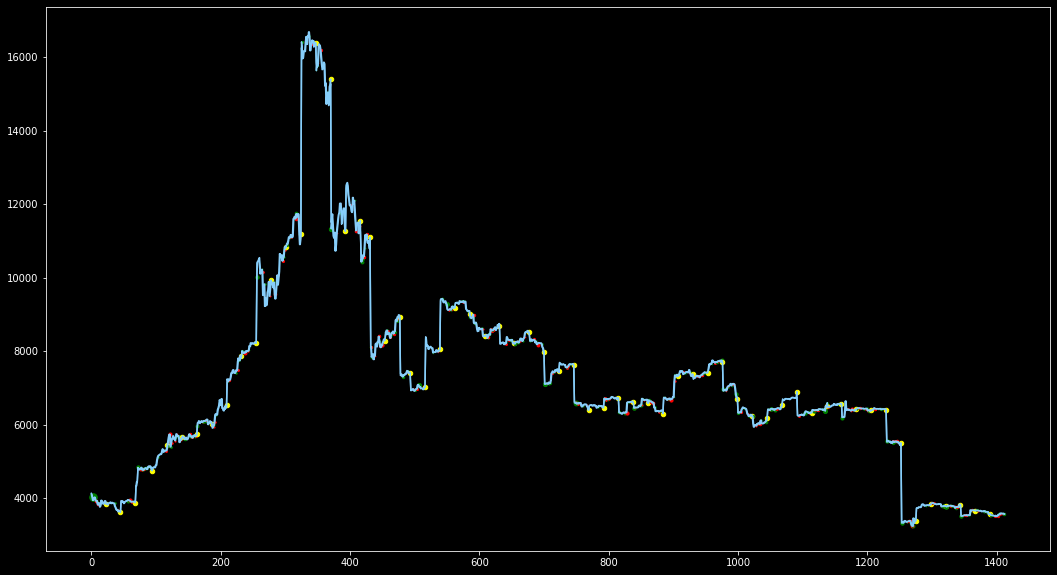

In [99]:
#plot trading history
algo.plot()

In [100]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [101]:
#a better plotting of trading history with Bokeh
btc['Open'] = btc['open']
algo.plot2(btc)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\Custom Trading Engine\./Trading Strategy\custom_trading_engine.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['Position USD'].apply(np.sign)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\Custom Trading Engine\./Trading Strategy\custom_trading_engine.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['Position USD'].diff().fillna(1)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\Custom Trading Engine\./Tradin

In [102]:
# Print Analytics
print(algo.metrics.dropna().info(verbose= True))
algo.metrics.dropna().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1411 entries, 2017-09-13 03:00:00 to 2019-01-22 22:00:00
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1411 non-null   object
 1   Position BTC      1411 non-null   object
 2   Price USD         1411 non-null   object
 3   Cash USD          1411 non-null   object
 4   Portfolio Marked  1411 non-null   object
dtypes: object(5)
memory usage: 66.1+ KB
None


,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked
2017-09-13 03:00:00,1.311291,0.000326,4027.869667,-0.311291,0.973025
2017-09-13 04:00:00,0.037155,0.000002,3943.177944,0.962845,0.972577
2017-09-13 05:00:00,0.037155,0.000002,3943.177944,0.962845,0.972591
2017-09-13 06:00:00,0.037155,0.000002,3943.177944,0.962845,0.972525
2017-09-13 07:00:00,0.037155,0.000002,3943.177944,0.962845,0.972622


#### Spreads visualization

In [103]:
p = figure(x_axis_type="datetime", title="Daily Spread (Kraken)", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Spread %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
df1['year'] = df1['date'].apply(lambda x : int(x[:4]))
df_spreads = df1[df1['year']>2016][df1['year']<2020]
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(df_spreads.index.values, df_spreads['spreads'].values*100, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

<ipython-input-103-21d5d29ff736>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spreads = df1[df1['year']>2016][df1['year']<2020]


#### Asset curve

In [104]:
# Per Day

p = figure(x_axis_type="datetime", title="Portfolio Value", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [2]:
# Per Trade

p = figure(title="Portfolio Value", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
#output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

NameError: name 'figure' is not defined

#### Portfolio Daily Returns

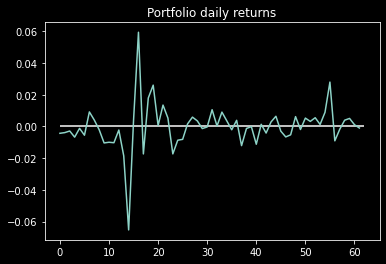

In [106]:
# caclulate date and hour of trades
algo.metrics['date'] =  algo.metrics.index.map(lambda x : str(x)[:-9])
algo.metrics['hour'] =  algo.metrics.index.map(lambda x : str(x)[-8:])

plt.title("Portfolio daily returns")
daily_returns = algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna()
plt.hlines(0 ,0 ,daily_returns.shape[0])
plt.plot(daily_returns.values)

In [107]:
p = figure(x_axis_type="datetime", title="Daily Returns", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Return %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'

daily_returns.index = pd.to_datetime(daily_returns.index)
daily_returns.index

# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.vbar(daily_returns.index.values, width=1, top = daily_returns.values, color='steelblue')

# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [108]:
# Sharpe Ratio
import ffn
ffn.calc_sharpe(daily_returns, nperiods = 252, annualize = True)

-0.011986063161019226

#### Portfolio Hourly Returns

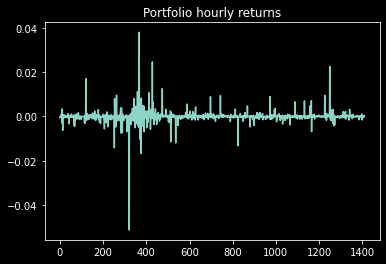

In [109]:
plt.title("Portfolio hourly returns")
returns = algo.metrics['Portfolio Marked'].pct_change().dropna()

plt.plot(returns.values)
plt.savefig('hourly_returns.png')

In [110]:
p = figure(x_axis_type="datetime", title="Hourly Returns", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Return %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'

returns.index = pd.to_datetime(returns.index)
returns.index

# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.vbar(returns.index.values, width=1, top = returns.values, color='steelblue')

# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [111]:
# Sharpe Ratio
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

-0.2613551981153155

#### Trading Heatmaps

In [112]:
# calculate weekdays
algo.metrics['day'] = algo.metrics.date.apply(lambda x : pd.to_datetime(x).weekday())

In [138]:
#Heatmap 1 : Average position size per hour per weekday
#Heatmap 2 : Average direction (long/short) per hour per weekday
days = list(set(algo.metrics.day.values))
hours = list(set(algo.metrics.hour.values))
heatm = pd.DataFrame(columns=sorted(hours), index = sorted(days))
heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(days))
heatm = heatm.fillna(0.)
heatm2 = heatm2.fillna(0.)
algo.metrics = algo.metrics.fillna(0.)
count = 0
for idx, row in algo.metrics.iterrows():
    d = row['day']
    h = row['hour']
    if row['Position USD'] !=0:
        count += 1
        heatm.loc[d][h]  += row['Position USD']
        heatm2.loc[d][h] = np.sign(heatm.loc[d][h])
heatm = heatm/count
heatm.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatm2.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

heatm

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Mon,0.000843,0.000844,0.000715,0.000739,0.000381,0.000029,0.000106,-0.000021,0.000003,-0.000294,...,0.000364,0.000186,-0.000051,-0.000169,-0.000302,-0.000127,-0.000261,1.341770e-04,0.000075,0.0
Tue,0.001145,0.001124,0.001504,0.000578,0.000375,0.000209,-0.000009,-0.000423,-0.000210,-0.000148,...,-0.000386,-0.000089,-0.000101,-0.000016,-0.000502,0.000328,0.000167,7.602459e-04,0.000951,0.0
Wed,0.000259,-0.000011,0.001101,0.000017,0.000094,-0.000023,-0.000018,-0.000449,-0.000272,-0.000272,...,-0.000239,-0.000042,-0.000106,-0.000060,-0.000088,0.000173,0.000095,1.333194e-04,-0.000120,0.0
Thu,0.000878,0.000502,0.001144,0.001012,0.000440,0.000734,0.000832,0.000125,0.000494,-0.000420,...,0.000151,0.000014,0.000054,0.000032,-0.000199,-0.000169,0.000252,3.120861e-04,0.000365,0.0
Fri,0.000879,0.000562,0.001160,0.000421,0.000690,0.000442,0.000183,0.000214,0.000027,0.000355,...,-0.000123,-0.000171,0.000301,-0.000160,-0.000105,-0.000085,-0.000033,-8.495626e-07,-0.000132,0.0
Sat,0.000231,0.000136,0.000136,0.000136,0.000140,0.000159,0.000086,0.000154,-0.000205,-0.000162,...,0.000191,-0.000321,-0.000321,-0.000321,0.000092,0.000262,0.000262,-8.565359e-05,-0.000086,0.0
Sun,0.000185,0.000185,0.000185,0.000202,-0.000068,0.000010,0.000209,0.000293,0.000084,-0.000275,...,0.000387,0.000241,0.000464,0.000327,0.000327,0.000566,0.000451,5.374295e-04,0.000431,0.0


In [139]:
heatm2

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Mon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0
Tue,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0
Wed,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,0.0
Thu,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0
Fri,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
Sat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,0.0
Sun,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [140]:
# dates = list(set(algo.metrics.date.values))
# hours = list(set(algo.metrics.hour.values))
# heatm = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
# heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
# for d in sorted(dates):
#     for h in sorted(hours):
#         this_datetime = d + " " + h
#         if this_datetime in algo.metrics.index and algo.metrics.loc[this_datetime]['Position USD'] != 0:
#             heatm2.loc[d][h] = algo.metrics.loc[this_datetime]['Position USD']/abs(algo.metrics.loc[this_datetime]['Position USD'])
#             heatm.loc[d][h] = algo.metrics.loc[this_datetime]['Position USD']
#         else:
#             heatm.loc[d][h] = 0
# heatm = heatm.fillna(0)
# heatm2 = heatm2.fillna(0)
# heatm2

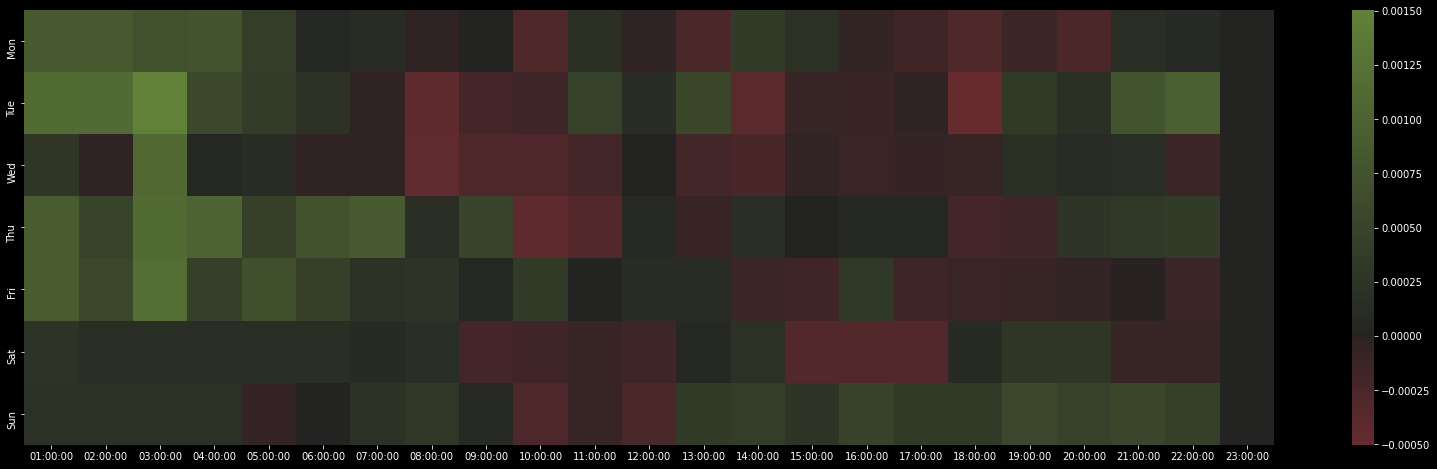

In [141]:
import seaborn as sns
import pandas as pd
import numpy as np

cmap = sns.diverging_palette(10, 110, s=75, l=50, n=9,center = 'dark', as_cmap=True)

fig = plt.figure(figsize=(28, 8))
# Default heatmap
p1 = sns.heatmap(heatm, cmap = cmap, center = 0)
plt.savefig('heatmapX.png')

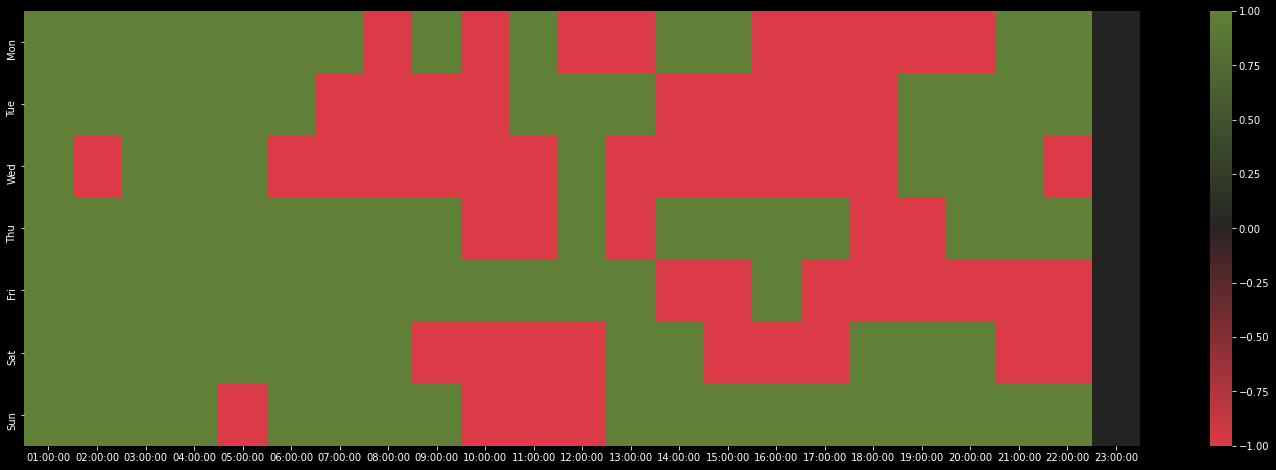

In [142]:
fig = plt.figure(figsize=(25, 8))
# Default heatmap
p1 = sns.heatmap(heatm2, cmap = cmap, center = 0)
plt.savefig('heatmap2X.png')

## Compare Periods

In [30]:
df_final['year'] =  df_final.index.map(lambda x : str(x)[:4])
df_17 = df_final[df_final['year']=='2017']
df_18 = df_final[df_final['year']=='2018']
df_19 = df_final[df_final['year']=='2019']
print(df_17, df_18, df_19)

                      Bitcoin  Bitcoin_median          Open  \
date                                                          
2017-09-13 01:00:00  0.814122        0.891900   4128.005439   
2017-09-13 02:00:00  0.812894        0.850564   4066.801167   
2017-09-13 03:00:00  0.853220        0.846102   3999.225167   
2017-09-13 04:00:00  0.838326        0.846102   3959.409667   
2017-09-13 05:00:00  0.782210        0.815073   3995.046667   
...                       ...             ...           ...   
2017-12-27 19:00:00  0.789274        0.819227  15033.023333   
2017-12-27 20:00:00  0.825048        0.846539  14766.958167   
2017-12-27 21:00:00  0.710272        0.747295  15041.734000   
2017-12-27 22:00:00  0.781089        0.855101  15281.260667   
2017-12-27 23:00:00  0.763905        0.790627  15342.861864   

                                   date      open     close        volume  \
date                                                                        
2017-09-13 01:00:00 2017-0

### 2017

In [31]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_17['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_17[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return self.pos * (self.data[datetime] - mean) / stdv


Opening LONG position of  1.0  USD at  4103.394724548955  $
Opening SHORT position of  2.3870431414589914  USD at  4024.1303328707136  $
Opening LONG position of  0.8711083018920334  USD at  3946.84205551955  $
Opening LONG position of  2.0767586410896177  USD at  4011.852232114199  $
Opening SHORT position of  2.455937826352443  USD at  3981.1503019930583  $
Opening SHORT position of  0.26625022836870693  USD at  4021.131726065296  $
Opening LONG position of  2.131826605930555  USD at  3937.687806276074  $
Opening SHORT position of  1.247531799425229  USD at  3927.57519373626  $
Opening SHORT position of  0.8988037399700821  USD at  3936.7409352048207  $
Opening LONG position of  1.9930606222986351  USD at  3856.7102178862465  $
Opening SHORT position of  0.8615076644218927  USD at  3820.2250701023017  $
Opening LONG position of  1.8530290525336501  USD at  3879.9410012123126  $
Opening SHORT position of  2.3378878618141785  USD at  3835.008201653012  $
Opening LONG position of  1.730

Opening LONG position of  1.459900426068511  USD at  6076.314716441845  $
Opening SHORT position of  1.1794781858780568  USD at  6074.943866767563  $
Closing SHORT position of  -0.41683604324611767  USD at  6012.86  $
Opening SHORT position of  1.1525897036243704  USD at  5907.752547215837  $
Opening LONG position of  0.6126394928213811  USD at  5953.569043867638  $
Opening LONG position of  2.20450027078354  USD at  5987.957926451329  $
Opening SHORT position of  1.2168027216677255  USD at  6066.775133544294  $
Opening SHORT position of  0.9466141975880603  USD at  6261.458117586279  $
Opening SHORT position of  0.6946215599045106  USD at  6290.552124801548  $
Opening LONG position of  0.7602110376403174  USD at  6269.87272298262  $
Opening LONG position of  1.4397402263565846  USD at  6275.385750129438  $
Opening SHORT position of  1.3566863666277285  USD at  6521.415220873513  $
Opening LONG position of  0.9025346635462608  USD at  6683.669934799224  $
Opening LONG position of  1.05

Opening SHORT position of  1.391661282450253  USD at  15206.336095072049  $
Opening LONG position of  1.300204538633642  USD at  14952.538030192494  $
Opening SHORT position of  2.252220173625134  USD at  14871.505288234071  $
Opening LONG position of  4.732198894914742  USD at  14711.416312126681  $
Opening SHORT position of  2.870544443595727  USD at  15092.653539938463  $
Opening LONG position of  0.7232759065024534  USD at  15280.603637469589  $
Closing LONG position of  1.3267875782532335  USD at  Open     15272.89
Close    15399.99
Name: 2017-12-27 23:00:00, dtype: float64  $


In [32]:
p = figure(x_axis_type="datetime", title="Portfolio Value 2017", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [33]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2017", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

### 2018

In [34]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_18['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_18[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening SHORT position of  1.0  USD at  11541.598311034384  $
Opening LONG position of  1.0616549091561789  USD at  11735.374567572913  $
Opening SHORT position of  1.3951929228996132  USD at  11448.441434490069  $
Opening LONG position of  3.000408240101051  USD at  11142.937110238809  $
Opening SHORT position of  1.574158056205508  USD at  11096.172318777439  $
Opening SHORT position of  1.1059774262523105  USD at  11223.259846096127  $
Opening LONG position of  2.0028847367788587  USD at  11226.394648351015  $
Opening SHORT position of  1.1926294300534126  USD at  11396.78089432726  $
Opening LONG position of  1.3092920591251538  USD at  11591.572656800985  $
Opening SHORT position of  2.0750422645488165  USD at  11756.295878025581  $
Opening LONG position of  1.402258004115894  USD at  11899.638133474855  $
Opening LONG position of  1.0543072946842837  USD at  11581.596974568896  $
Opening SHORT position of  1.0755864229444285  USD at  11292.270492221916  $
Closing LONG position of

Opening SHORT position of  0.37056910454325886  USD at  7968.809248698178  $
Opening LONG position of  0.710311106227747  USD at  7977.681913205253  $
Opening LONG position of  1.6463139679453926  USD at  7969.730236774714  $
Opening SHORT position of  0.8384453704563931  USD at  7972.168540169045  $
Opening LONG position of  1.4404931349828543  USD at  8030.643078865261  $
Opening SHORT position of  1.5657777630635261  USD at  7989.2349405879995  $
Opening SHORT position of  0.7552835755354594  USD at  8014.889529618485  $
Opening LONG position of  1.6900118479578674  USD at  8041.07527825778  $
Closing LONG position of  1.2991847947043949  USD at  8053.36  $
Opening SHORT position of  1.2503193863392954  USD at  9405.75231276313  $
Opening LONG position of  1.7460317914923744  USD at  9430.30123567287  $
Opening LONG position of  0.9178566536838852  USD at  9325.153827969796  $
Opening SHORT position of  1.6816999785436642  USD at  9321.256306152143  $
Opening LONG position of  1.586

Opening SHORT position of  0.9205454857235984  USD at  8558.312592784552  $
Opening SHORT position of  0.4724134926194281  USD at  8487.986376541721  $
Closing SHORT position of  -0.14736972640772494  USD at  8523.86  $
Opening SHORT position of  1.2266078741125153  USD at  8274.17060350419  $
Opening LONG position of  2.6437949168791466  USD at  8288.181292103573  $
Opening SHORT position of  2.46558771635038  USD at  8324.682060586789  $
Opening LONG position of  0.6423042398736544  USD at  8274.99906336938  $
Opening LONG position of  1.0581727486852033  USD at  8268.237920255333  $
Opening SHORT position of  1.238638991910699  USD at  8189.514921176725  $
Opening LONG position of  1.7378116484774484  USD at  8221.269979332901  $
Opening SHORT position of  0.9415862241595934  USD at  8224.608985776867  $
Opening SHORT position of  1.3615081099872253  USD at  8227.568485241722  $
Opening LONG position of  0.6826500795858101  USD at  8215.238959661645  $
Opening SHORT position of  1.0

Opening SHORT position of  1.0954401330931456  USD at  6615.994593176538  $
Opening LONG position of  1.8258936847859895  USD at  6610.484335466019  $
Opening SHORT position of  1.1772163542120881  USD at  6609.045596671716  $
Opening SHORT position of  0.26070473116720305  USD at  6629.432652604567  $
Opening LONG position of  0.47128068144665136  USD at  6616.045138262162  $
Opening SHORT position of  0.46165916047164457  USD at  6622.343676314036  $
Closing SHORT position of  -1.125114232047818  USD at  6612.98  $
Opening LONG position of  1.1666181268029563  USD at  6458.856456846818  $
Opening SHORT position of  2.2287532658645945  USD at  6472.261353948362  $
Opening LONG position of  1.789153843964681  USD at  6469.6480047839095  $
Opening SHORT position of  0.7909623255176832  USD at  6469.581738422079  $
Opening SHORT position of  1.3713934256490925  USD at  6469.071811586854  $
Opening LONG position of  1.8380632943831123  USD at  6467.767735078466  $
Opening LONG position of

Closing LONG position of  0.22833984641144034  USD at  6197.9  $
Opening SHORT position of  1.317087365855555  USD at  6412.965551401853  $
Opening LONG position of  3.403522749510377  USD at  6396.352225051  $
Opening SHORT position of  1.4881886699018043  USD at  6428.173691107458  $
Opening LONG position of  0.4148193940190539  USD at  6433.566776106519  $
Opening LONG position of  2.1563902124866408  USD at  6441.9077961496  $
Opening SHORT position of  0.7746792903599844  USD at  6432.393174970552  $
Opening SHORT position of  2.538197231734014  USD at  6407.816181284571  $
Opening SHORT position of  1.0255328765147234  USD at  6398.617306511949  $
Opening LONG position of  0.8492284101794645  USD at  6431.186485015089  $
Opening LONG position of  0.36832306133922077  USD at  6440.247593119442  $
Opening SHORT position of  0.8653695665986345  USD at  6454.9704132711795  $
Opening SHORT position of  0.37906872101059164  USD at  6450.450966100283  $
Opening LONG position of  1.66416

Opening SHORT position of  1.1446183680142026  USD at  4028.098067077509  $
Opening LONG position of  1.3630068153533927  USD at  3974.8896206090785  $
Opening SHORT position of  1.2442828508136219  USD at  3933.4392621653974  $
Opening LONG position of  1.7251580128995065  USD at  3913.2258196250446  $
Opening SHORT position of  1.4372962951935058  USD at  3909.3046661516837  $
Opening LONG position of  1.4486274690300966  USD at  3907.2344787021843  $
Opening LONG position of  3.00961827932276  USD at  3863.9847989852396  $
Opening SHORT position of  2.3457702274867396  USD at  3890.558863531256  $
Opening SHORT position of  3.3180425682669106  USD at  3898.5770681721  $
Closing SHORT position of  -1.6136716227005183  USD at  3902.06  $
Opening SHORT position of  1.2618075489412794  USD at  3356.0851693433847  $
Opening LONG position of  1.0622543095767756  USD at  3340.740488945803  $
Opening SHORT position of  1.2247827448240236  USD at  3328.7721262665164  $
Opening LONG position 

In [35]:
# Portfolio value per date

p = figure(x_axis_type="datetime", title="Portfolio Value 2018", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [36]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2018", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

### 2019

In [37]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_19['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_19[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening SHORT position of  1.0  USD at  3862.794581727327  $
Opening LONG position of  0.8862208901710428  USD at  3865.1955683454644  $
Opening LONG position of  0.18598027100897935  USD at  3875.017767919816  $
Opening SHORT position of  0.6067026016821078  USD at  3863.2044898917384  $
Opening LONG position of  0.6825027653044345  USD at  3849.6320830728673  $
Opening SHORT position of  0.9449783777562453  USD at  3830.8317426633766  $
Opening LONG position of  1.0661227389521917  USD at  3834.308651557688  $
Opening SHORT position of  0.5491564078317439  USD at  3851.1371934418826  $
Opening LONG position of  0.5965857562911634  USD at  3847.981713490619  $
Opening SHORT position of  1.6213444152628473  USD at  3840.659540849133  $
Opening LONG position of  2.181143904067187  USD at  3773.184963575143  $
Opening SHORT position of  1.0696562980545636  USD at  3779.153320667268  $
Opening SHORT position of  1.818909420555084  USD at  3781.3328323707215  $
Opening LONG position of  1.

In [38]:
p = figure(x_axis_type="datetime", title="Portfolio Value 2019", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [39]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2019", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

## Generate Random Strategies

In [91]:
# #best strategy play the opposite (with stoploss)
# cash = []
# for stop in range(1, 50):
#     signal = Signal2(df['Bitcoin'])
#     strategy = BitcoinNLPStrategy2()
#     strategy.add_signal(signal)
#     algo = customNLP(100000, df['Open'], strategy)
#     algo.set_stoploss(stop/1000)
    
#     algo.run(split = True, verbose = False)
#     cash.append(algo.cash)
# #plt.plot(list(algo.metrics['Portfolio Marked']))

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)